# Introducci√≥n

En el desaf√≠o Alura Store, an√°lisis de ventas y rendimiento de las tiendas, el objetivo es ayudar al se√±or Juan a decidir qu√© tienda debe vender para invertir en un nuevo negocio. Para ello, evaluar√© cu√°l de las cuatro tiendas tiene un desempe√±o menor, permitiendo al se√±or Juan tomar la mejor decisi√≥n de cu√°l sucursal debe vender para invertir en un nuevo negocio. Esta desici√≥n debe de estar bastante informada.

### Importaci√≥n de datos



In [2]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n

Vamos a sumar los valores de la columna Precio de cada tienda y descubriremos cu√°l est√° facturando m√°s.

In [3]:
facturacion_tienda1 = tienda1['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

print("Facturaci√≥n total por tienda:")
print(f"Tienda 1: ${facturacion_tienda1:,.2f}")
print(f"Tienda 2: ${facturacion_tienda2:,.2f}")
print(f"Tienda 3: ${facturacion_tienda3:,.2f}")
print(f"Tienda 4: ${facturacion_tienda4:,.2f}")


Facturaci√≥n total por tienda:
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00


1.1 Gr√°fico de pastel - % Facturaci√≥n total por tienda

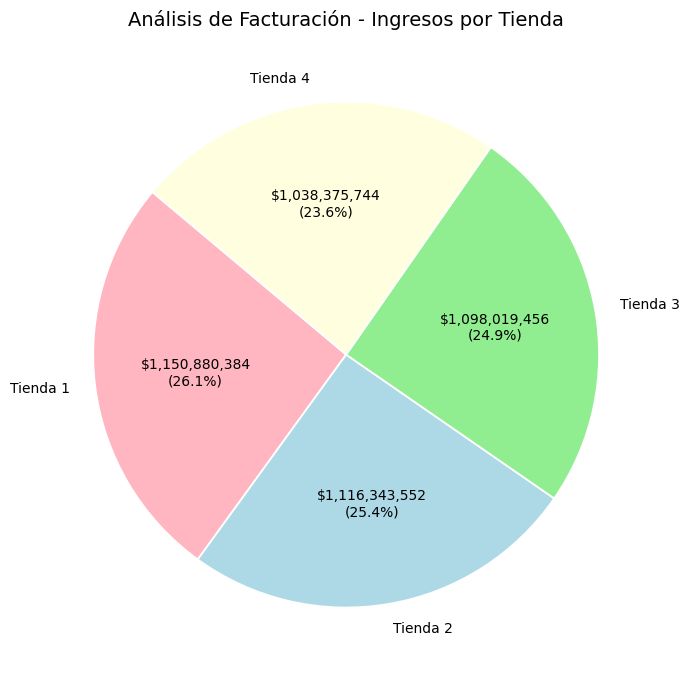

In [7]:
import seaborn as sns

# Datos base
labels = total_suma['Tienda']
sizes = total_suma['Ingreso Total']

# Funci√≥n para mostrar valores con formato moneda
def formato_monto(pct, all_vals):
    valor_absoluto = int(pct / 100 * sum(all_vals))
    return f'${valor_absoluto:,.0f}\n({pct:.1f}%)'

colors = sns.color_palette('pastel')
import seaborn as sns
import matplotlib.pyplot as plt

# Datos base
labels = total_suma['Tienda']
sizes = total_suma['Ingreso Total']

# Funci√≥n para mostrar valores con formato moneda
def formato_monto(pct, all_vals):
    valor_absoluto = int(pct / 100 * sum(all_vals))
    return f'${valor_absoluto:,.0f}\n({pct:.1f}%)'

colors = sns.color_palette('pastel')
# Crear gr√°fico
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct=lambda pct: formato_monto(pct, sizes), startangle=140, colors= ['LightPink', 'Lightblue', 'Lightgreen', 'LightYellow'], shadow=False, wedgeprops={'edgecolor': 'white', 'linewidth': 1.3})

plt.title('An√°lisis de Facturaci√≥n - Ingresos por Tienda', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()



Otra opci√≥n de calcular la facturaci√≥n por tienda

In [5]:
#funci√≥n para contar productos por PRECIO y conviertiendolo a Df
def ingresos_precios(df, nombre_tienda):
    suma_tiendas = df['Precio'].sum()
    cantidad = len(df)
    return pd.DataFrame({'Tienda': [nombre_tienda], 'Conteo' : [cantidad], 'Ingreso Total' : [suma_tiendas]})

#aplicar a la funcion por cada tienda
c1 = ingresos_precios(tienda1, 'Tienda 1')
c2 = ingresos_precios(tienda2, 'Tienda 2')
c3 = ingresos_precios(tienda3, 'Tienda 3')
c4 = ingresos_precios(tienda4, 'Tienda 4')

#uniendo todo para gr√°ficar
total_suma = pd.concat([c1, c2, c3, c4], ignore_index=True)
pd.options.display.float_format = '{:,.2f}'.format
total_suma

Tienda  Conteo    Ingreso Total
0  Tienda 1    2359 1,150,880,400.00
1  Tienda 2    2359 1,116,343,500.00
2  Tienda 3    2359 1,098,019,600.00
3  Tienda 4    2358 1,038,375,700.00

 1.2. Gr√°fico de barras ‚Äì Facturaci√≥n total por tienda

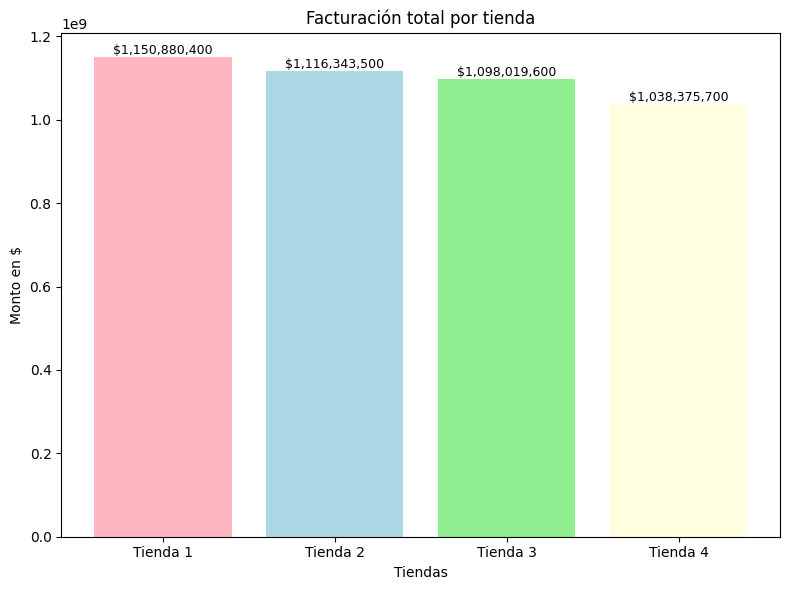

In [8]:
# Datos de facturaci√≥n
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [
    tienda1['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

# Gr√°fico
plt.figure(figsize=(8,6))
plt.bar(tiendas, facturacion, color= ['LightPink', 'Lightblue', 'Lightgreen', 'LightYellow'])
plt.title('Facturaci√≥n total por tienda')
plt.ylabel('Monto en $')
plt.xlabel('Tiendas')
plt.tight_layout()

for i, valor in enumerate(facturacion):
    plt.text(i, valor + 50, f"${valor:,.0f}", ha='center', va='bottom', fontsize=9)
plt.show()

# 2. Ventas por categor√≠a

¬°Es momento de descubrir qu√© categor√≠as de productos se venden m√°s en cada tienda!
En este paso, vamos a agrupar los datos por categor√≠a y contar cu√°ntas ventas hubo de cada tipo. Esto nos permitir√° identificar las categor√≠as m√°s populares por tienda.

In [9]:
categorias_tienda1 = tienda1['Categor√≠a del Producto'].value_counts()
categorias_tienda2 = tienda2['Categor√≠a del Producto'].value_counts()
categorias_tienda3 = tienda3['Categor√≠a del Producto'].value_counts()
categorias_tienda4 = tienda4['Categor√≠a del Producto'].value_counts()

print("Categor√≠as m√°s populares por tienda:")

print("Tienda 1:")
print(categorias_tienda1, '\n')

print("Tienda 2:")
print(categorias_tienda2, '\n')

print("Tienda 3:")
print(categorias_tienda3, '\n')

print("Tienda 4:")
print(categorias_tienda4, '\n')

#"Name: count": indica que la Series tiene el nombre "count", porque value_counts() internamente usa ese nombre.
#"dtype: int64": indica que los valores son enteros de 64 bits (es decir, conteos de frecuencia).

Categor√≠as m√°s populares por tienda:
Tienda 1:
Categor√≠a del Producto
Muebles                    465
Electr√≥nicos               448
Juguetes                   324
Electrodom√©sticos          312
Deportes y diversi√≥n       284
Instrumentos musicales     182
Libros                     173
Art√≠culos para el hogar    171
Name: count, dtype: int64 

Tienda 2:
Categor√≠a del Producto
Muebles                    442
Electr√≥nicos               422
Juguetes                   313
Electrodom√©sticos          305
Deportes y diversi√≥n       275
Instrumentos musicales     224
Libros                     197
Art√≠culos para el hogar    181
Name: count, dtype: int64 

Tienda 3:
Categor√≠a del Producto
Muebles                    499
Electr√≥nicos               451
Juguetes                   315
Electrodom√©sticos          278
Deportes y diversi√≥n       277
Libros                     185
Instrumentos musicales     177
Art√≠culos para el hogar    177
Name: count, dtype: int64 

Tienda 4:
Categor√≠

 Vamos a organizar la salida del Paso 2 en forma de DataFrame para que sea m√°s clara y presentable.

In [10]:
# Funci√≥n para crear DataFrame limpio de categor√≠as m√°s vendidas
def categorias_mas_vendidas(df, nombre_tienda):
    categorias = df['Categor√≠a del Producto'].value_counts().reset_index()
    categorias.columns = ['Categor√≠a del producto', 'Cantidad de ventas']
    print(f"\n{nombre_tienda.upper()} - Categor√≠as m√°s vendidas:\n")
    print(categorias)

# Mostrar resultados
categorias_mas_vendidas(tienda1, "Tienda 1")
categorias_mas_vendidas(tienda2, "Tienda 2")
categorias_mas_vendidas(tienda3, "Tienda 3")
categorias_mas_vendidas(tienda4, "Tienda 4")



TIENDA 1 - Categor√≠as m√°s vendidas:

    Categor√≠a del producto  Cantidad de ventas
0                  Muebles                 465
1             Electr√≥nicos                 448
2                 Juguetes                 324
3        Electrodom√©sticos                 312
4     Deportes y diversi√≥n                 284
5   Instrumentos musicales                 182
6                   Libros                 173
7  Art√≠culos para el hogar                 171

TIENDA 2 - Categor√≠as m√°s vendidas:

    Categor√≠a del producto  Cantidad de ventas
0                  Muebles                 442
1             Electr√≥nicos                 422
2                 Juguetes                 313
3        Electrodom√©sticos                 305
4     Deportes y diversi√≥n                 275
5   Instrumentos musicales                 224
6                   Libros                 197
7  Art√≠culos para el hogar                 181

TIENDA 3 - Categor√≠as m√°s vendidas:

    Categor√≠a del produ

2.1. Gr√°fico de barras apiladas‚Äì Categor√≠as m√°s vendidas en las tiendas

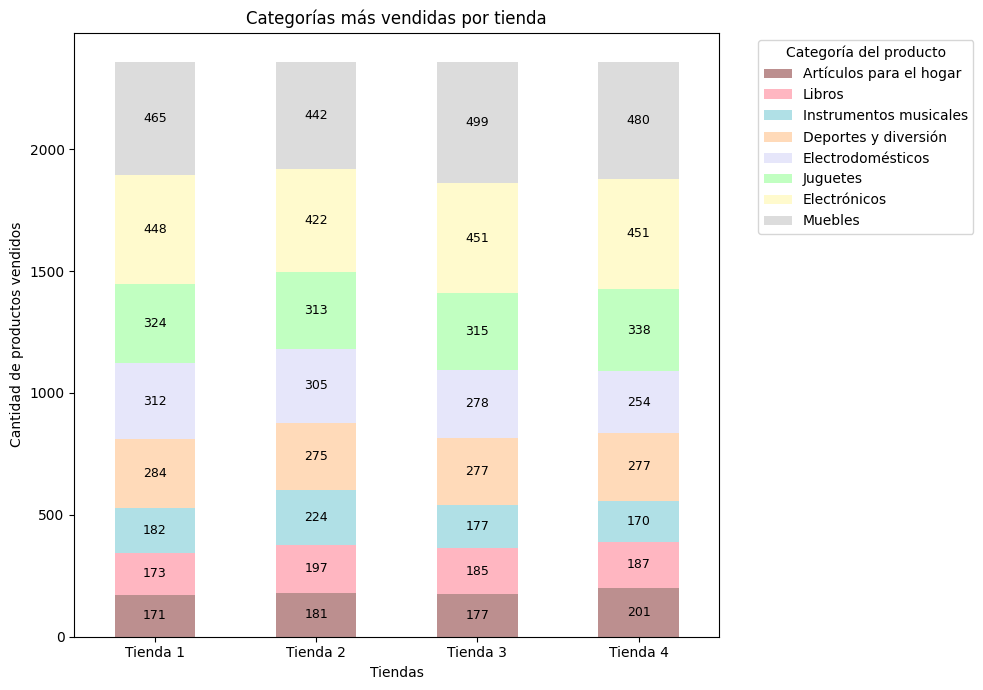

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Contar categor√≠as por tienda
cat1 = tienda1['Categor√≠a del Producto'].value_counts()
cat2 = tienda2['Categor√≠a del Producto'].value_counts()
cat3 = tienda3['Categor√≠a del Producto'].value_counts()
cat4 = tienda4['Categor√≠a del Producto'].value_counts()

# Unificar en un solo DataFrame
df_categorias = pd.DataFrame({
    'Tienda 1': cat1,
    'Tienda 2': cat2,
    'Tienda 3': cat3,
    'Tienda 4': cat4
}).fillna(0)

# Reordenar para que las categor√≠as est√©n como columnas
df_categorias = df_categorias.T  # Tiendas como filas

# Ordenar columnas (categor√≠as) por suma total ascendente
orden_columnas = df_categorias.sum(axis=0).sort_values().index
df_categorias = df_categorias[orden_columnas]  # Ordenar columnas

# Colores pastel
pastel_colors = ['#BC8F8F', '#FFB6C1', '#B0E0E6', '#FFDAB9', '#E6E6FA', '#C1FFC1', '#FFFACD', '#DCDCDC']

# Gr√°fico de columnas apiladas
ax = df_categorias.plot(kind='bar', stacked=True, figsize=(10, 7), color=pastel_colors)

plt.title("Categor√≠as m√°s vendidas por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Cantidad de productos vendidos")
plt.legend(title='Categor√≠a del producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()

# Agregar etiquetas con cantidades en cada bloque
for i, tienda in enumerate(df_categorias.index):
    y_offset = 0
    for j, valor in enumerate(df_categorias.loc[tienda]):
        if valor > 0:
            plt.text(i, y_offset + valor / 2, int(valor), ha='center', va='center', fontsize=9)
            y_offset += valor

plt.show()


In [12]:
ingresos_por_categoria_tienda1 = tienda1.groupby('Categor√≠a del Producto')['Precio'].sum()
ingresos_por_categoria_tienda2 = tienda2.groupby('Categor√≠a del Producto')['Precio'].sum()
ingresos_por_categoria_tienda3 = tienda3.groupby('Categor√≠a del Producto')['Precio'].sum()
ingresos_por_categoria_tienda4 = tienda4.groupby('Categor√≠a del Producto')['Precio'].sum()

print("Ingresos por categor√≠a por tienda: \n")
print(f"Tienda 1: ${ingresos_por_categoria_tienda1}\n")
print(f"Tienda 2: ${ingresos_por_categoria_tienda2}\n")
print(f"Tienda 3: ${ingresos_por_categoria_tienda3}\n")
print(f"Tienda 4: ${ingresos_por_categoria_tienda4}\n")

Ingresos por categor√≠a por tienda: 

Tienda 1: $Categor√≠a del Producto
Art√≠culos para el hogar    12,698,400.00
Deportes y diversi√≥n       39,290,000.00
Electrodom√©sticos         363,685,200.00
Electr√≥nicos              429,493,500.00
Instrumentos musicales     91,299,000.00
Juguetes                   17,995,700.00
Libros                      8,784,900.00
Muebles                   187,633,700.00
Name: Precio, dtype: float64

Tienda 2: $Categor√≠a del Producto
Art√≠culos para el hogar    14,746,900.00
Deportes y diversi√≥n       34,744,500.00
Electrodom√©sticos         348,567,800.00
Electr√≥nicos              410,831,100.00
Instrumentos musicales    104,990,300.00
Juguetes                   15,945,400.00
Libros                     10,091,200.00
Muebles                   176,426,300.00
Name: Precio, dtype: float64

Tienda 3: $Categor√≠a del Producto
Art√≠culos para el hogar    15,060,000.00
Deportes y diversi√≥n       35,593,100.00
Electrodom√©sticos         329,237,900.00
Electr√

2.2. Gr√°fico de barras apiladas‚Äì Categor√≠as m√°s vendidas en las tiendas ($)

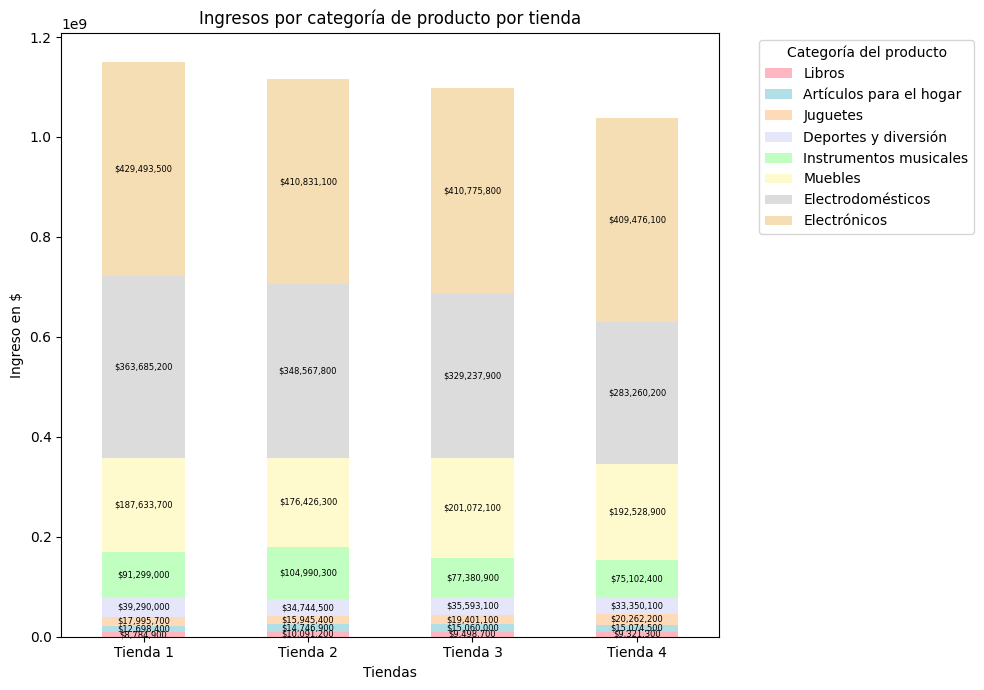

In [13]:

# Calcular ingresos por categor√≠a por tienda

ingresos_por_categoria_tienda1 = tienda1.groupby('Categor√≠a del Producto')['Precio'].sum()
ingresos_por_categoria_tienda2 = tienda2.groupby('Categor√≠a del Producto')['Precio'].sum()
ingresos_por_categoria_tienda3 = tienda3.groupby('Categor√≠a del Producto')['Precio'].sum()
ingresos_por_categoria_tienda4 = tienda4.groupby('Categor√≠a del Producto')['Precio'].sum()

# Unir en un DataFrame
df_ingresos = pd.DataFrame({
    'Tienda 1': ingresos_por_categoria_tienda1,
    'Tienda 2': ingresos_por_categoria_tienda2,
    'Tienda 3': ingresos_por_categoria_tienda3,
    'Tienda 4': ingresos_por_categoria_tienda4
}).fillna(0).T  # Tiendas como filas

# Ordenar categor√≠as por ingresos totales (suma de todas las tiendas)
orden_categorias = df_ingresos.sum(axis=0).sort_values().index
df_ingresos = df_ingresos[orden_categorias]

# Definir colores pastel
pastel_colors = ['#FFB6C1', '#B0E0E6', '#FFDAB9', '#E6E6FA', '#C1FFC1', '#FFFACD', '#DCDCDC', '#F5DEB3']
pastel_colors = pastel_colors[:len(df_ingresos.columns)]

# Crear gr√°fico apilado
ax = df_ingresos.plot(kind='bar', stacked=True, figsize=(10, 7), color=pastel_colors)

# T√≠tulos y etiquetas
plt.title("Ingresos por categor√≠a de producto por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Ingreso en $")
plt.xticks(rotation=0)
plt.legend(title="Categor√≠a del producto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Agregar etiquetas con montos en cada bloque
for i, tienda in enumerate(df_ingresos.index):
    y_offset = 0
    for j, valor in enumerate(df_ingresos.loc[tienda]):
        if valor > 0:
            plt.text(i, y_offset + valor / 2, f"${valor:,.0f}", ha='center', va='center', fontsize=6)
            y_offset += valor

plt.show()


# 3. Calificaci√≥n promedio de la tienda


In [14]:
eval_prom_tienda1 = tienda1['Calificaci√≥n'].mean()
eval_prom_tienda2 = tienda2['Calificaci√≥n'].mean()
eval_prom_tienda3 = tienda3['Calificaci√≥n'].mean()
eval_prom_tienda4 = tienda4['Calificaci√≥n'].mean()

print("Evaluaci√≥n promedio por tienda:")
print(f"Tienda 1: {eval_prom_tienda1:.2f}")
print(f"Tienda 2: {eval_prom_tienda2:.2f}")
print(f"Tienda 3: {eval_prom_tienda3:.2f}")
print(f"Tienda 4: {eval_prom_tienda4:.2f}")


Evaluaci√≥n promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


3.1. Gr√°fico de l√≠neas ‚Äì Evaluaci√≥n promedio de clientes por tienda

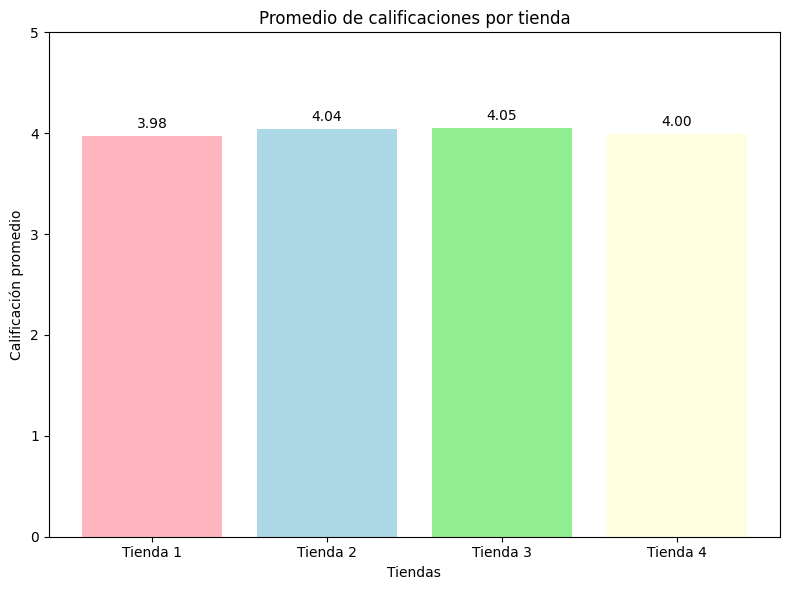

In [15]:

# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
evaluaciones = [
    tienda1['Calificaci√≥n'].mean(),
    tienda2['Calificaci√≥n'].mean(),
    tienda3['Calificaci√≥n'].mean(),
    tienda4['Calificaci√≥n'].mean()
]

# Crear gr√°fico de barras
plt.figure(figsize=(8,6))
bars = plt.bar(tiendas, evaluaciones, color=['LightPink', 'Lightblue', 'Lightgreen', 'LightYellow'])

# T√≠tulos y etiquetas
plt.title('Promedio de calificaciones por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Calificaci√≥n promedio')
plt.ylim(0, 5)  # Rango t√≠pico de calificaci√≥n

# Agregar etiquetas de valor encima de las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.05, f"{height:.2f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# 4. Productos m√°s y menos vendidos

In [16]:
# Funci√≥n para mostrar el producto m√°s y menos vendido
def productos_extremos(df, nombre_tienda):
    productos = df['Producto'].value_counts()
    mas_vendido = productos.idxmax()
    menos_vendido = productos.idxmin()
    print(f"\n{nombre_tienda.upper()}:\n")
    print(f"üìà Producto m√°s vendido: {mas_vendido} ({productos.max()} ventas)")
    print(f"üìâ Producto menos vendido: {menos_vendido} ({productos.min()} venta(s))")

# Ejecutar para cada tienda
productos_extremos(tienda1, "Tienda 1")
productos_extremos(tienda2, "Tienda 2")
productos_extremos(tienda3, "Tienda 3")
productos_extremos(tienda4, "Tienda 4")



TIENDA 1:

üìà Producto m√°s vendido: Microondas (60 ventas)
üìâ Producto menos vendido: Auriculares con micr√≥fono (33 venta(s))

TIENDA 2:

üìà Producto m√°s vendido: Iniciando en programaci√≥n (65 ventas)
üìâ Producto menos vendido: Juego de mesa (32 venta(s))

TIENDA 3:

üìà Producto m√°s vendido: Kit de bancas (57 ventas)
üìâ Producto menos vendido: Bloques de construcci√≥n (35 venta(s))

TIENDA 4:

üìà Producto m√°s vendido: Cama box (62 ventas)
üìâ Producto menos vendido: Guitarra el√©ctrica (33 venta(s))


# 5. Env√≠o promedio por tienda

In [17]:
# Costo de env√≠o promedio por tienda
envio_prom_tienda1 = tienda1['Costo de env√≠o'].mean()
envio_prom_tienda2 = tienda2['Costo de env√≠o'].mean()
envio_prom_tienda3 = tienda3['Costo de env√≠o'].mean()
envio_prom_tienda4 = tienda4['Costo de env√≠o'].mean()

# Mostrar resultados
print("Costo promedio de env√≠o por tienda:")
print(f"Tienda 1: ${envio_prom_tienda1:.2f}")
print(f"Tienda 2: ${envio_prom_tienda2:.2f}")
print(f"Tienda 3: ${envio_prom_tienda3:.2f}")
print(f"Tienda 4: ${envio_prom_tienda4:.2f}")


Costo promedio de env√≠o por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


5.1. Gr√°fico del costo promedio enviado por tienda

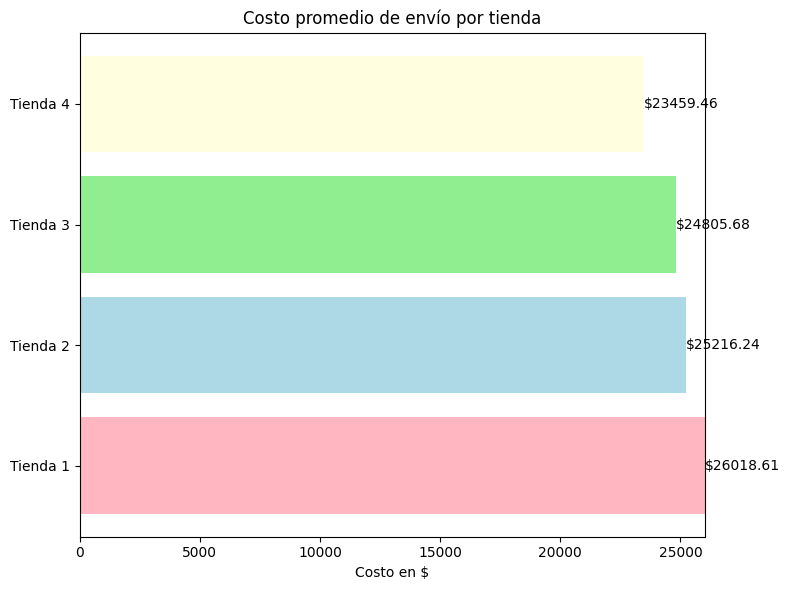

In [18]:

# Datos
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envios_promedio = [envio_prom_tienda1, envio_prom_tienda2, envio_prom_tienda3, envio_prom_tienda4]
colores = ['LightPink', 'Lightblue', 'Lightgreen', 'LightYellow']  # Tonos pastel

# Gr√°fico
plt.figure(figsize=(8,6))
bars = plt.barh(tiendas, envios_promedio, color=colores)

# Agregar etiquetas en las barras
for bar in bars:
    ancho = bar.get_width()
    plt.text(ancho + 0.2, bar.get_y() + bar.get_height()/2,
             f"${ancho:.2f}", va='center', fontsize=10)

# T√≠tulos y etiquetas
plt.title("Costo promedio de env√≠o por tienda")
plt.xlabel("Costo en $")
plt.xlim(0, max(envios_promedio) + 5)
plt.tight_layout()
plt.show()


# Rentabilidad de cada tienda

In [19]:
# Paso 1: Calcular ingresos totales por tienda (sumando los precios)
ingresos_t1 = tienda1['Precio'].sum()
ingresos_t2 = tienda2['Precio'].sum()
ingresos_t3 = tienda3['Precio'].sum()
ingresos_t4 = tienda4['Precio'].sum()

# Paso 2: Calcular costos de env√≠o totales
envio_t1 = tienda1['Costo de env√≠o'].sum()
envio_t2 = tienda2['Costo de env√≠o'].sum()
envio_t3 = tienda3['Costo de env√≠o'].sum()
envio_t4 = tienda4['Costo de env√≠o'].sum()

# Paso 3: Calcular rentabilidad
rentabilidad_t1 = ingresos_t1 - envio_t1
rentabilidad_t2 = ingresos_t2 - envio_t2
rentabilidad_t3 = ingresos_t3 - envio_t3
rentabilidad_t4 = ingresos_t4 - envio_t4

# Paso 4: Mostrar resultados
print("Rentabilidad por tienda (ingresos - costo de env√≠o):\n")
print(f"Tienda 1: ${rentabilidad_t1:,.2f}")
print(f"Tienda 2: ${rentabilidad_t2:,.2f}")
print(f"Tienda 3: ${rentabilidad_t3:,.2f}")
print(f"Tienda 4: ${rentabilidad_t4:,.2f}")


Rentabilidad por tienda (ingresos - costo de env√≠o):

Tienda 1: $1,089,502,500.00
Tienda 2: $1,056,858,400.00
Tienda 3: $1,039,503,000.00
Tienda 4: $983,058,300.00


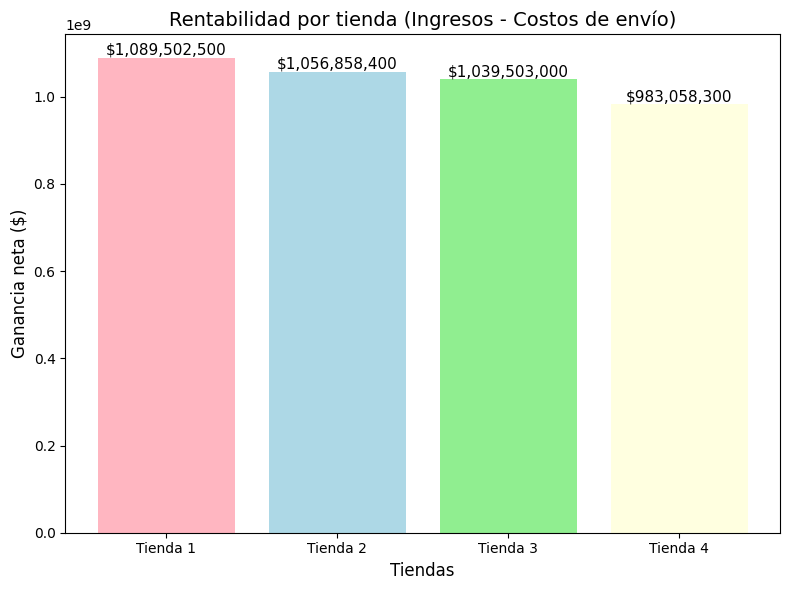

In [21]:


# Datos de rentabilidad
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
rentabilidades = [rentabilidad_t1, rentabilidad_t2, rentabilidad_t3, rentabilidad_t4]

# Crear gr√°fico
plt.figure(figsize=(8, 6))
colores = ['LightPink', 'Lightblue', 'Lightgreen', 'LightYellow']  # Tonos pastel

barras = plt.bar(tiendas, rentabilidades, color=colores)

# Etiquetas
plt.title('Rentabilidad por tienda (Ingresos - Costos de env√≠o)', fontsize=14)
plt.ylabel('Ganancia neta ($)', fontsize=12)
plt.xlabel('Tiendas', fontsize=12)
plt.xticks(rotation=0)

# Mostrar valores sobre cada barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, altura + 50, f"${altura:,.0f}", ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


#Conclusi√≥n


üßæ Conclusi√≥n Final: ¬øQu√© tienda vender?
üõë Tienda 4 es la que presenta el peor rendimiento general, por las siguientes razones clave:

Menor facturaci√≥n total, lo que indica pocas ventas.

Rentabilidad m√°s baja, ya que sus ingresos apenas cubren los costos de env√≠o.

Poca diversidad en productos y categor√≠as m√°s vendidas, lo que limita su potencial de crecimiento.

Aunque su calificaci√≥n no es la m√°s baja, no compensa sus otras debilidades.

‚úÖ Recomendaci√≥n:
üìâ Vender la Tienda 4 es la mejor opci√≥n, ya que tiene el menor rendimiento global y ofrece menos oportunidades de optimizaci√≥n en comparaci√≥n con las dem√°s.